In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.cluster import AgglomerativeClustering
hier = AgglomerativeClustering()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
sdtypes ={'Store_Number':str,'Zip_Code':str}

In [6]:
stores_clust_info_combined3= pd.read_csv(r'C:\Users\dgarb\OneDrive\Desktop\Capstone Data\liquor_2021\stores_clust_info_combined3.csv',dtype=sdtypes,index_col=0)

In [7]:
stores_clust_info_combined3.head()

,Store_Number,Store_Name,Address,City,Zip_Code,Store_Location,County_Number,County,Store_Name.1,store_revenue,...,cl_Cheap_scaled,cl_High_End_scaled,cl_Moderately_High_scaled,cl_Most_Variety_scaled,cl_Popular_Bottles_scaled,cl_Quick_Shots_scaled,cl_Volume_For_Dollar_scaled,num_unique_clusters_scaled,n_clusters_2,n_clusters_4
0,3855,Dyno's Wine and Spirits / Storm Lake,1201 1/2 Lakeshore Dr,Storm Lake,50588,NaN,11,BUENA VIST,Dyno's Wine and Spirits / Storm Lake,22050030.17,...,-1.622160,-0.421963,-0.4786,-0.595003,-2.535159,-0.660763,-0.782188,-1.853817,0,3
1,4589,Dyno's #53 / Sibley,1026 2nd Ave,Sibley,51249,POINT (-95.752119 43.397431),72,OSCEOLA,Dyno's #53 / Sibley,48408685.66,...,-1.537867,-0.421963,-0.4786,-0.589023,-2.403424,-0.763627,-0.650933,-0.870097,0,3
2,5688,Dyno's #40 / Spencer,1001 S Grand Ave,Spencer,51301,POINT (-95.143701 43.12759),21,CLAY,Dyno's #40 / Spencer,24308995.32,...,-1.790745,-0.421963,-0.4786,-0.654805,-2.271689,-0.840775,-0.716560,-1.853817,0,3
3,4592,Dyno's #29 / Emmetsburg,"2401, Main",Emmetsburg,50536,POINT (-94.681939 43.111913),74,PALO ALTO,Dyno's #29 / Emmetsburg,11723322.21,...,-1.706453,-0.421963,-0.4786,-0.600983,-2.798630,-0.609330,-0.650933,-0.870097,0,0
4,5689,Dyno's #41 / Albert City,5101 230th St,Albert City,50510,POINT (-94.953239 42.777449),11,BUENA VIST,Dyno's #41 / Albert City,6766721.37,...,-1.706453,-0.421963,-0.4786,-0.636864,-2.798630,-0.815059,-0.782188,-1.853817,0,3


In [9]:
stores_clust_info_combined3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 0 to 1947
Data columns (total 57 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Store_Number                      1948 non-null   object 
 1   Store_Name                        1948 non-null   object 
 2   Address                           1948 non-null   object 
 3   City                              1948 non-null   object 
 4   Zip_Code                          1948 non-null   object 
 5   Store_Location                    1790 non-null   object 
 6   County_Number                     1948 non-null   int64  
 7   County                            1948 non-null   object 
 8   Store_Name.1                      1948 non-null   object 
 9   store_revenue                     1948 non-null   float64
 10  tot_num_unique_items              1948 non-null   int64  
 11  num_unique_clusters               1948 non-null   int64  
 12  tot_it

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

def linkage_frame(data):
    row_clusters = linkage(data, method='complete', metric='euclidean')
    columns = ['row label 1', 'row label 2', 'distance', 'no. items in clust.']
    index = ['cluster %d' % (i + 1) for i in range(row_clusters.shape[0])]
    linkage_df = pd.DataFrame(row_clusters, columns=columns, index=index)
    return linkage_df

In [12]:
# from sklearn.preprocessing import StandardScaler

In [13]:
# scaler = StandardScaler()

In [15]:
# stores_clust_info_combined3[['Bottle_Volume_scaled', 'Bottle_Retail_scaled', 'orders_scaled' ]] = scaler.fit_transform\
#                                            (most_variety[['Bottle_Volume','Bottle_Retail','orders'] ])
                                                   


In [23]:
cluster_cols = ['tot_num_unique_items_scaled',
 'rev_Cheap_scaled',
 'rev_Moderately_High_scaled',
 'rev_Most_Variety_scaled',
 'rev_Popular_Bottles_scaled',
 'rev_Volume_For_Dollar_scaled', 
 'cl_Cheap_scaled',
 'cl_High_End_scaled',
 'cl_Moderately_High_scaled',
 'cl_Most_Variety_scaled',
 'cl_Popular_Bottles_scaled',
 
 'cl_Volume_For_Dollar_scaled']

In [20]:
stores_clust_info_combined3_copy = stores_clust_info_combined3.copy()

In [21]:
stores_clust_info_combined3 = stores_clust_info_combined3.set_index('Store_Number')

In [24]:
linkage_df = linkage_frame(stores_clust_info_combined3[cluster_cols])

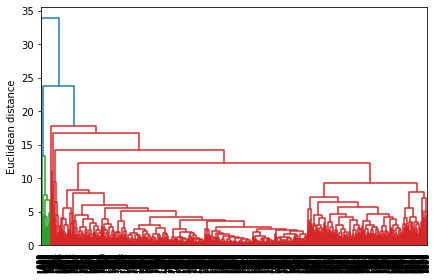

In [25]:
row_dendr = dendrogram(linkage_df, leaf_rotation=90, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

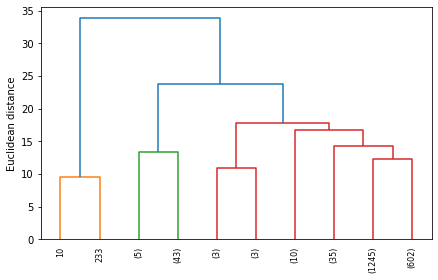

In [26]:
row_dendr = dendrogram(linkage_df, leaf_rotation=90, truncate_mode='lastp', p = 10, leaf_font_size=8)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [27]:
linkage_df

,row label 1,row label 2,distance,no. items in clust.
cluster 1,183.0,534.0,0.013616,2.0
cluster 2,997.0,1237.0,0.013616,2.0
cluster 3,1276.0,1847.0,0.036283,2.0
cluster 4,1583.0,1855.0,0.051078,2.0
cluster 5,1948.0,1949.0,0.054464,4.0
...,...,...,...,...
cluster 1943,3885.0,3888.0,14.275657,1882.0
cluster 1944,3788.0,3890.0,16.767820,1892.0
cluster 1945,3887.0,3891.0,17.794751,1898.0
cluster 1946,3889.0,3892.0,23.830527,1946.0
